In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import os
from tensorflow.keras import preprocessing
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing import image_dataset_from_directory

In [2]:
SEED = 42
np.random.seed(SEED)
random.seed(SEED)
tf.random.set_seed(SEED)
train = ImageDataGenerator(rescale = 1.0/255)
validation = ImageDataGenerator(rescale = 1.0/255)

In [3]:
train_dataset = train.flow_from_directory("C:/Users/lamim/Desktop/N_Thesis/split_dataset/train",
                                          target_size = (224,224),
                                          batch_size = 32,
                                          class_mode = 'categorical')
validation_dataset = validation.flow_from_directory("C:/Users/lamim/Desktop/N_Thesis/split_dataset/val",
                                          target_size = (224,224),
                                          batch_size = 32,
                                          class_mode = 'categorical')

Found 879 images belonging to 2 classes.
Found 112 images belonging to 2 classes.


In [4]:
train_dataset.class_indices

{'BMR': 0, 'RASH': 1}

In [5]:
validation_dataset.class_indices

{'BMR': 0, 'RASH': 1}

In [6]:
train_dataset.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [7]:
validation_dataset.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [ ]:

# Load the VGG-16 model with pretrained weights
vgg16_base = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the VGG-16 base layers
for layer in vgg16_base.layers:
    layer.trainable = False

# Build the model
model = Sequential([
    GlobalAveragePooling2D(),            
    Dropout(0.2),                        # Reduce dropout rate to 0.2
    Dense(2, activation='softmax')      
])

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=[
        'accuracy',
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall')
    ]
)

# Train the model
history = model.fit(
    train_dataset,
    validation_data=validation_dataset,
    epochs=10
)

C:\Users\lamim\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
 4/29 ━━━━━━━━━━━━━━━━━━━━ 41s 2s/step - accuracy: 0.4655 - loss: 0.7349 - precision: 0.4714 - recall: 0.7669

Epoch 1/10
275/275 ━━━━━━━━━━━━━━━━━━━━ 1321s 5s/step - accuracy: 0.5481 - loss: 0.7279 - precision: 0.5450 - recall: 0.3507 - val_accuracy: 0.6152 - val_loss: 0.6349 - val_precision: 0.6723 - val_recall: 0.2821
Epoch 2/10
275/275 ━━━━━━━━━━━━━━━━━━━━ 1502s 5s/step - accuracy: 0.6526 - loss: 0.6184 - precision: 0.7042 - recall: 0.4023 - val_accuracy: 0.6196 - val_loss: 0.6123 - val_precision: 0.7145 - val_recall: 0.3911
Epoch 3/10
275/275 ━━━━━━━━━━━━━━━━━━━━ 945s 3s/step - accuracy: 0.6830 - loss: 0.5927 - precision: 0.7234 - recall: 0.4815 - val_accuracy: 0.6402 - val_loss: 0.6001 - val_precision: 0.7121 - val_recall: 0.4196
Epoch 4/10
275/275 ━━━━━━━━━━━━━━━━━━━━ 951s 3s/step - accuracy: 0.6989 - loss: 0.5741 - precision: 0.7432 - recall: 0.5136 - val_accuracy: 0.6500 - val_loss: 0.5918 - val_precision: 0.7160 - val_recall: 0.4321
Epoch 5/10
275/275 ━━━━━━━━━━━━━━━━━━━━ 888s 3s/step - accuracy: 0.6993 - loss: 0.5687 - precision: 0.7399 - recall: 0.5164 - val_accuracy: 0.6500 - val_l

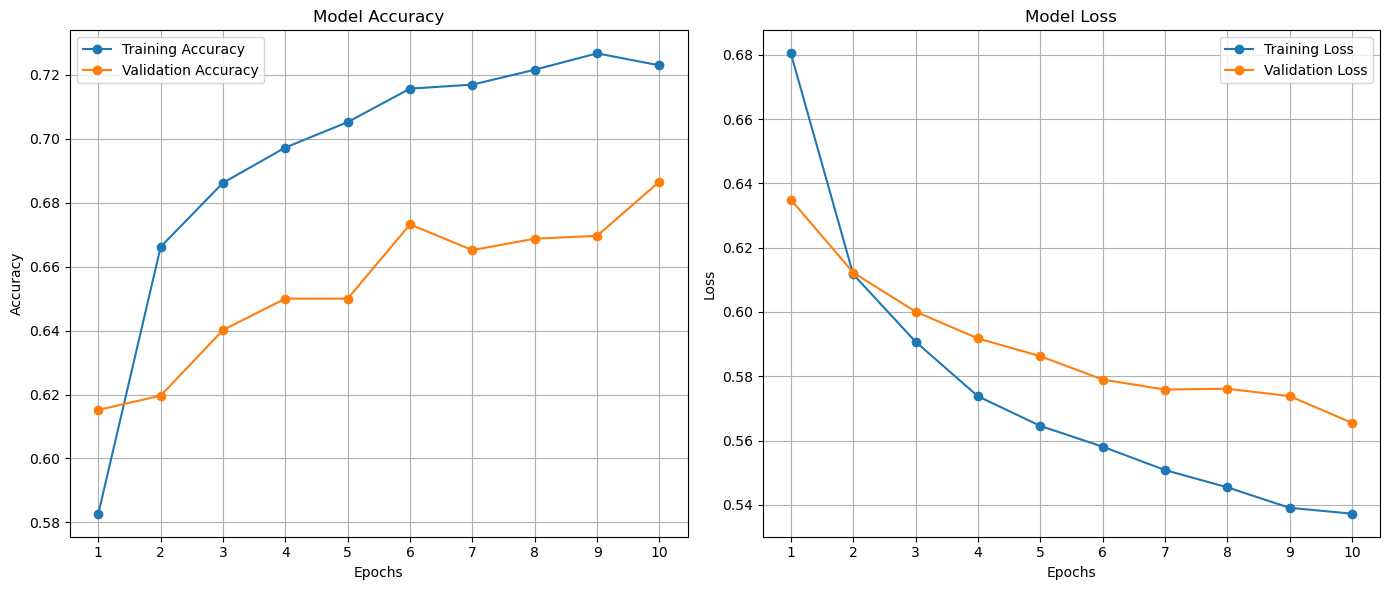

Plot saved to: C:\Users\lamim\Desktop\N_Thesis\BMR_CNN\RESULT_VGG_16\training_plot.png


In [9]:
import matplotlib.pyplot as plt
import os
import csv

# Example: extracting history
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(train_accuracy) + 1)

# Create an output directory if you like
output_dir = "my_results"
os.makedirs(output_dir, exist_ok=True)

# Save your CSV logs (optional, if desired)
csv_path = os.path.join(output_dir, "training_log.csv")
with open(csv_path, mode='w', newline='') as csv_file:
    writer = csv.writer(csv_file)
    writer.writerow(["Epoch", "Train Accuracy", "Val Accuracy", "Train Loss", "Val Loss"])
    for epoch in epochs:
        writer.writerow([
            epoch,
            train_accuracy[epoch-1],
            val_accuracy[epoch-1],
            train_loss[epoch-1],
            val_loss[epoch-1]
        ])

# Plot
plt.figure(figsize=(14, 6))

# Subplot for Accuracy
plt.subplot(1, 2, 1)
plt.plot(epochs, train_accuracy, label='Training Accuracy', marker='o')
plt.plot(epochs, val_accuracy, label='Validation Accuracy', marker='o')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.xticks(epochs)
plt.legend()
plt.grid()

# Subplot for Loss
plt.subplot(1, 2, 2)
plt.plot(epochs, train_loss, label='Training Loss', marker='o')
plt.plot(epochs, val_loss, label='Validation Loss', marker='o')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.xticks(epochs)
plt.legend()
plt.grid()

plt.tight_layout()
# Suppose you want a folder "RESULT_DenseNet121" + a filename "training_plot.png"
output_dir = r"C:\Users\lamim\Desktop\N_Thesis\BMR_CNN\RESULT_VGG_16"
os.makedirs(output_dir, exist_ok=True)  # Create folder if needed

fig_path = os.path.join(output_dir, "training_plot.png")
plt.savefig(fig_path, dpi=300)
plt.show()

print(f"Plot saved to: {fig_path}")


In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

test_datagen = ImageDataGenerator(rescale=1.0/255)  # Normalize test images

test_dataset = test_datagen.flow_from_directory(
    "C:/Users/lamim/Desktop/N_Thesis/split_dataset/test",
    target_size=(224, 224),
    batch_size=32,
    class_mode="categorical",
    shuffle=False
)

Found 112 images belonging to 2 classes.


In [12]:
results = model.evaluate(test_dataset)  # Evaluate the test dataset
test_acc = results[1] 

print(f"Test Accuracy: {test_acc:.4f}")

4/4 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - accuracy: 0.6817 - loss: 0.5962 - precision: 0.5544 - recall: 0.9585
Test Accuracy: 0.7069


In [13]:
test_acc, test_precision, test_recall = results  # Unpack all metrics

print(f"Test Accuracy: {test_acc:.4f}")
print(f"Test Precision: {test_precision:.4f}")
print(f"Test Recall: {test_recall:.4f}")


Test Accuracy:0.7069
Test Precision: 0.7069
Test Recall: 0.6898
